In [1]:
import json
import re
import nltk
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysentimiento.preprocessing import preprocess_tweet

## Corpus: SENT-COVID


In [2]:
with open('data/SENT-COVID.json') as file:
    data = json.load(file)
    
pd.options.mode.chained_assignment = None                                        
pd.set_option('display.max_colwidth',None)   


df = pd.DataFrame(data)
print('Numero de tweets: ' + str(len(df)))
df.head()

Numero de tweets: 4594


,Label,Tweet,id
0,NEUTRO,-@dulcema201 @BronstonRaqsa02 Protocolo de COVID !!!!,1401047081121353728
1,NEUTRO,-#COVID19 #QuedateEnCasa en Morelia Centro,1258159310162595843
2,POSITIVO,-México va en en aumento con el #Covid_19. Tal vez no tengamos la estabilidad de Europa o estados unidos. Para mantener 120 días en paro total. Pero podemos ser precavidos al usar la #SanaDistancia,1272748988626862082
3,NEUTRO,-@sororavirus Creo en todo y nada. 💜,1349385638722883585
4,NEGATIVO,-@GobiernoMX había prometido 389,1360615587114844161


### Funciones para el preprocesamiento 

In [3]:
def clean_tweet(text):
  text = re.sub(r'[~^0-9]', '', text) #numeros
  text = re.sub("\\s+", ' ', text) ##Espacios blancos dobles
  text = re.sub('\n', ' ', text) ##Saltos de linea

  pattern = r'([.])([A-Z#@¿])'
  pattern2 = r'([-?])([a-zA-Z#@¿])'
  pattern3 = r'([a-zA-Z])([#@¿(])'
  pattern4 = r'([:!])([a-zA-Z#@¿])'
  text = re.sub(pattern, r'\1 \2', text)  # Separacion de punto seguido por una mayuscula o signo '#', '@', '¿'
  text = re.sub(pattern2, r'\1 \2', text) # Separacion de '-' o '?' seguido por una letra o '#' o '@' o '¿'
  text = re.sub(pattern3, r'\1 \2', text)
  text = re.sub(pattern4, r'\1 \2', text)
  return text 


def preprocess(text):  # Preprocesamiento de pysentimiento   
  return preprocess_tweet(text, char_replace=True, normalize_laughter=True, shorten=2, 
                          emoji_wrapper='', user_token='', url_token='')  


def normalize(text):
 pattern2 = r'([a-zA-Z])([.])' # De haber separado antes estos patrones, no habria reconocido las url's.
 pattern3 = r'([.])([a-zA-Z])'
 text = re.sub(pattern2, r'\1 \2', text)
 text = re.sub(pattern3, r'\1 \2', text)
 
 text = "".join(u for u in text if u not in ("?","¿", ".", ";", ":", "!","¡",'"',"%","“","”","$","&","'","\\", "(",")",
                                             "*","+",",","/","<",">","=","^","•","...", "ç","π","ⓘ", "-", "_","#","|"))
 a,b = 'áéíóúÁÉÍÓÚ','aeiouAEIOU'
 trans = str.maketrans(a,b)     
 text = text.translate(trans) # Reemplazo de palabras acentuadas       

 pattern  = r'([a-z])([A-Z-])'
 text = re.sub(pattern, r'\1 \2', text)

 #text = re.sub(r'@[A-Za-z0-9_]+', '', text)
 text = text.lower()
 return text  


def tokenize(text):    
  text= text.split(sep = ' ')  # Tokenización por palabras individuales
  text= [token for token in text if len(token) > 1]  # Eliminación de tokens con una longitud < 2
  return(text) 

def labels(label):         # Converte etiquetas 'pos', 'neu', 'neg' en -1,0,1
  if label == 'POSITIVO':
    label=1
  elif label == 'NEUTRO':
     label=0
  else:
     label=-1
  return(label) 

In [8]:
df['clean_tweet'] = df['Tweet'].apply(clean_tweet) 
df['preprocess_tweet'] = df['clean_tweet'].apply(preprocess)
df['norm_tweet'] = df['preprocess_tweet'].apply(normalize) # Tweet final normalizado
df['tokenized_tweet'] = df['norm_tweet'].apply(tokenize)   # Tweet final tokenizado 
df['class'] = df['Label'].apply(labels)

df[['Tweet','norm_tweet','Label', 'class']][110:130]

,Tweet,norm_tweet,Label,class
110,-@Quetzal0518 Ya el canciller Mil Usos,ya el canciller mil usos,NEUTRO,0
111,-Cada vez más triste la situación de este virus creado en un laboratorio. Que forma de dañar a la humanidad solo Dios sabe porque intereses.,cada vez mas triste la situacion de este virus creado en un laboratorio que forma de dañar a la humanidad solo dios sabe porque intereses,NEGATIVO,-1
112,-Haciendo unas ricas #empanadas #hacerpan #QuedateEnCasa #aprende #cocina #panaderia en Atlixco Centro,haciendo unas ricas empanadas hacerpan quedate en casa aprende cocina panaderia en atlixco centro,POSITIVO,1
113,-@ArturoErdely Dr. Arturo gracias por los análisis y estadísticas de Covid 19,dr arturo gracias por los analisis y estadisticas de covid,POSITIVO,1
114,-MALDITA PANDEMIA.... 🤦🏻‍♂️,maldita pandemia 🤦 tono de piel claro ‍,NEGATIVO,-1
115,-Despiértame cuando pase el Covid. https://t.co/adp66oYrbE,despiertame cuando pase el covid,NEGATIVO,-1
116,-@Salvado07797816 @EnriqueAlfaroR Seguro tienes para defender al peor gobierno de la historia reciente de México; pésimo manejo de la pandemia,seguro tienes para defender al peor gobierno de la historia reciente de mexico pesimo manejo de la pandemia,NEGATIVO,-1
117,-Y López persiste en la estúpida idea de las clases presenciales,y lopez persiste en la estupida idea de las clases presenciales,NEGATIVO,-1
118,-Perdón si no e subido nada,perdon si no e subido nada,NEGATIVO,-1
119,-Ccp la chapulina antivacunas @LillyTellez https://t.co/lRmllrF5vD,ccp la chapulina antivacunas,NEUTRO,0


### Lemmatizacion

In [5]:
import spacy
from nltk.stem.snowball import SnowballStemmer  # Para hacer steamming

sp = spacy.load('es_core_news_sm')     

def lemmatization(text):
    doc = sp(text)
    return ' '.join([word.lemma_ for word in doc]) 

#stemmer = SnowballStemmer('spanish')
#stemmed_spanish = [stemmer.stem(item) for item in spanish_words]

In [7]:
df['lem_tweet'] = df['norm_tweet'].apply(lemmatization)
df['lemtokenized_tweet'] = df['lem_tweet'].apply(tokenize)
df[['Label', 'norm_tweet','lem_tweet','tokenized_tweet','lemtokenized_tweet']][110:130]

,Label,norm_tweet,lem_tweet,tokenized_tweet,lemtokenized_tweet
110,NEUTRO,ya el canciller mil usos,ya el canciller mil uso,"[ya, el, canciller, mil, usos]","[ya, el, canciller, mil, uso]"
111,NEGATIVO,cada vez mas triste la situacion de este virus creado en un laboratorio que forma de dañar a la humanidad solo dios sabe porque intereses,cada vez mas tristar el situacion de este virus creado en uno laboratorio que formar de dañar a el humanidad solo dios saber porque interés,"[cada, vez, mas, triste, la, situacion, de, este, virus, creado, en, un, laboratorio, que, forma, de, dañar, la, humanidad, solo, dios, sabe, porque, intereses]","[cada, vez, mas, tristar, el, situacion, de, este, virus, creado, en, uno, laboratorio, que, formar, de, dañar, el, humanidad, solo, dios, saber, porque, interés]"
112,POSITIVO,haciendo unas ricas empanadas hacerpan quedate en casa aprende cocina panaderia en atlixco centro,hacer uno rica empanada hacerpan quedate en casa aprender cocín panaderio en atlixco centro,"[haciendo, unas, ricas, empanadas, hacerpan, quedate, en, casa, aprende, cocina, panaderia, en, atlixco, centro]","[hacer, uno, rica, empanada, hacerpan, quedate, en, casa, aprender, cocín, panaderio, en, atlixco, centro]"
113,POSITIVO,dr arturo gracias por los analisis y estadisticas de covid,dr arturo gracia por el analisis y estadistica de covid,"[dr, arturo, gracias, por, los, analisis, estadisticas, de, covid]","[dr, arturo, gracia, por, el, analisis, estadistica, de, covid]"
114,NEGATIVO,maldita pandemia 🤦 tono de piel claro ‍,maldito pandemiar 🤦 tono de piel claro ‍,"[maldita, pandemia, tono, de, piel, claro]","[maldito, pandemiar, tono, de, piel, claro]"
115,NEGATIVO,despiertame cuando pase el covid,despiertame cuando pase el covid,"[despiertame, cuando, pase, el, covid]","[despiertame, cuando, pase, el, covid]"
116,NEGATIVO,seguro tienes para defender al peor gobierno de la historia reciente de mexico pesimo manejo de la pandemia,seguro tener para defender al peor gobierno de el historia reciente de mexico pesimo manejo de el pandemia,"[seguro, tienes, para, defender, al, peor, gobierno, de, la, historia, reciente, de, mexico, pesimo, manejo, de, la, pandemia]","[seguro, tener, para, defender, al, peor, gobierno, de, el, historia, reciente, de, mexico, pesimo, manejo, de, el, pandemia]"
117,NEGATIVO,y lopez persiste en la estupida idea de las clases presenciales,y lopez persistir en el estupido idea de el clase presencial,"[lopez, persiste, en, la, estupida, idea, de, las, clases, presenciales]","[lopez, persistir, en, el, estupido, idea, de, el, clase, presencial]"
118,NEGATIVO,perdon si no e subido nada,perdon si no e subir nada,"[perdon, si, no, subido, nada]","[perdon, si, no, subir, nada]"
119,NEUTRO,ccp la chapulina antivacunas,ccp el chapulina antivacuna,"[ccp, la, chapulina, antivacunas]","[ccp, el, chapulina, antivacuna]"


### Stopwords

In [10]:
from nltk.corpus import stopwords

# Obtención de listado de stopwords del español
stop_words_esp = list(stopwords.words('spanish'))
my_stop_words = stop_words_esp[:100]


def remove_stopwords(text):
    text = [w for w in text if not w in stop_words_esp]
    return text

df['normsw_tweet'] = df['norm_tweet'].apply(remove_stopwords)
df['lemsw_tweet'] = df['lem_tweet'].apply(remove_stopwords)
df['normtoksw_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
df['lemtoksw_tweet'] = df['lemtokenized_tweet'].apply(remove_stopwords)

print(stop_words_esp[0:50])
len(stop_words_esp)


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni']


313

### Hashtags mas frecuentes

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


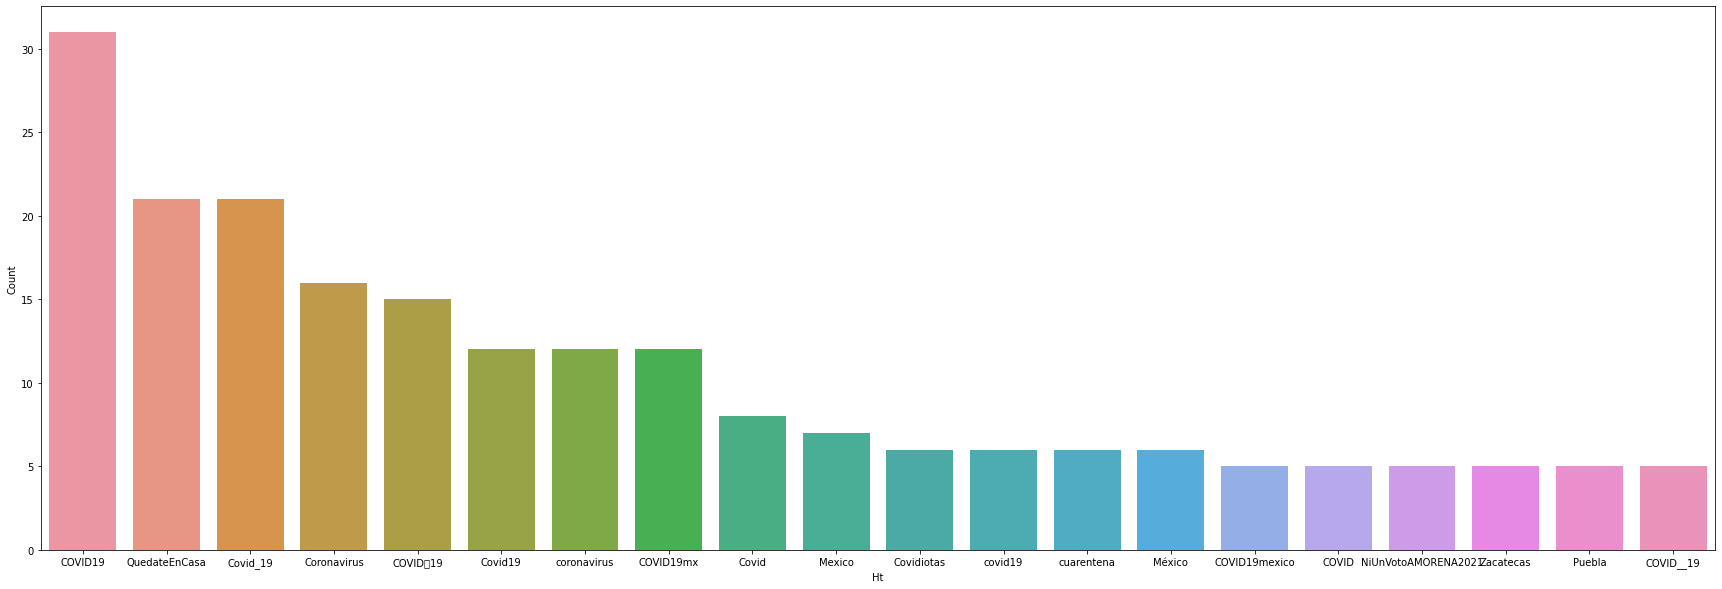

In [9]:
import seaborn as sns
from itertools import chain

def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags


ht_positivo = hashtag_extract(df['Tweet'][df['Label'] == 'POSITIVO']) 
ht_negativo = hashtag_extract(df['Tweet'][df['Label'] == 'NEGATIVO']) 
ht_positivo = list(chain(*ht_positivo))
ht_negativo = list(chain(*ht_negativo))    

a = nltk.FreqDist(ht_negativo)
d = pd.DataFrame( {'Ht': list(a.keys()), 'Count': list(a.values())}) 

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(30,10))
ax = sns.barplot(data=d, x= "Ht", y = "Count")
ax.set(ylabel = 'Count')
plt.show()